# Regresión Lineal OLS

OLS (Ordinary Least Squares) es un método de estimación utilizado en la regresión lineal para encontrar los coeficientes que minimizan la suma de los cuadrados de las diferencias entre los valores observados y los predichos. En otras palabras, OLS busca la "línea de mejor ajuste" a través de los datos, minimizando la suma de los cuadrados de las diferencias verticales entre los valores observados y los predichos.

En el contexto de la regresión lineal, el modelo OLS puede expresarse matemáticamente de la siguiente manera para un conjunto de datos con $n$ observaciones y $p$ variables predictoras:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \varepsilon
$$

Donde:

- $Y$ es la variable dependiente.
- $X_1, X_2, \ldots, X_p$ son las variables predictoras.
- $\beta_0, \beta_1, \ldots, \beta_p$ son los coeficientes a estimar.
- $\varepsilon$ es el término de error.

El método OLS busca encontrar los valores de $ \beta_0, \beta_1, \ldots, \beta_p $ que minimizan la función de costo, que es la suma de los cuadrados de las diferencias entre los valores observados y los predichos:

$\text{Minimizar} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip}))^2$

En este contexto, OLS utiliza técnicas matriciales para encontrar una solución analítica para los coeficientes que minimizan la suma de los cuadrados de las diferencias. Este método es conocido como "mínimos cuadrados ordinarios" porque minimiza la suma de los cuadrados de los residuos.

## Diferencia entre OLS y LinearRegression

La diferencia principal entre **`statsmodels.OLS`** y **`sklearn.LinearRegression`** radica en su enfoque, funcionalidades y salidas:

### **1. Enfoque y propósito**

- **`statsmodels.OLS`**:
    - Está diseñado para **análisis estadísticos detallados**.
    - Proporciona **información completa sobre el modelo**, como p-valores, intervalos de confianza, tests de hipótesis (t-test, F-test), R² ajustado, y diagnósticos de regresión (heterocedasticidad, multicolinealidad, etc.).
    - Es más utilizado en **econometría, ciencias sociales e investigación** donde la inferencia estadística es importante.
    - No incluye regularización (L1/L2) por defecto.
- **`sklearn.LinearRegression`**:
    - Está optimizado para **predicción y machine learning**.
    - Proporciona menos detalles estadísticos (solo coeficientes y R² básico).
    - Se integra mejor en flujos de trabajo de ML (pipelines, validación cruzada, búsqueda de hiperparámetros).
    - No calcula p-valores ni intervalos de confianza por defecto.

### **2. Formato de entrada**

- **`statsmodels.OLS`**:
    - **No añade automáticamente el intercepto (término constante)**. Debes hacerlo manualmente con **`sm.add_constant(X)`**:
        
        ```python
        X_train_const = sm.add_constant(X_train)  # Añade una columna de 1's para el intercepto
        model = sm.OLS(y_train, X_train_const).fit()
        ```
        
- **`sklearn.LinearRegression`**:
    - **Añade automáticamente el intercepto** (puedes desactivarlo con **`fit_intercept=False`**).

### **3. Salida y métodos disponibles**

- **`statsmodels.OLS`**:
    - Ofrece un **resumen detallado** con **`.summary()`**:CopyDownload
        
        ```python
        print(model.summary())  # Muestra p-valores, R², tests, etc.
        ```
        
    - Métodos útiles: **`.predict()`**, **`.conf_int()`**, **`.t_test()`**, **`.f_test()`**, etc.
- **`sklearn.LinearRegression`**:
    - Solo proporciona coeficientes (**`.coef_`**) e intercepto (**`.intercept_`**).
    - No hay p-valores ni tests estadísticos sin librerías adicionales (e.g., **`scipy`**).

### **4. Rendimiento y escalabilidad**

- **`statsmodels`** es más lento con datasets grandes (no está optimizado para Big Data).
- **`sklearn`** es más eficiente y escalable (usa NumPy y optimizaciones para ML).

### **5. Uso en Machine Learning**

- **`sklearn`** se integra mejor con:
    - Validación cruzada (**`cross_val_score`**).
    - Pipelines (**`Pipeline`**).
    - Preprocesamiento (**`StandardScaler`**, **`PolynomialFeatures`**).
- **`statsmodels`** es menos usado en ML, pero mejor para diagnóstico de modelos.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Dell\PyhtonIA\Machine Learning\hormigon.csv")

In [4]:
descripcion = data.describe(include = "all").T
print(descripcion)

               count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992

In [5]:
descripcion["Nulos"] = data.isnull().sum()
descripcion["Tipos"] = data.dtypes

In [6]:
descripcion.head(len(data))

,count,mean,std,min,25%,50%,75%,max,Nulos,Tipos
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0,0,float64
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4,0,float64
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1,0,float64
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0,0,float64
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2,0,float64
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0,0,float64
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6,0,float64
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0,0,int64
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6,0,float64


# Descripción gráfica de los datos

## Diagrama de correlación

In [7]:
data.corr()["strength"]

cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
age             0.328873
strength        1.000000
Name: strength, dtype: float64

El mismo diagrama de correlación pero sólo con los valores bajo la diagonal:

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

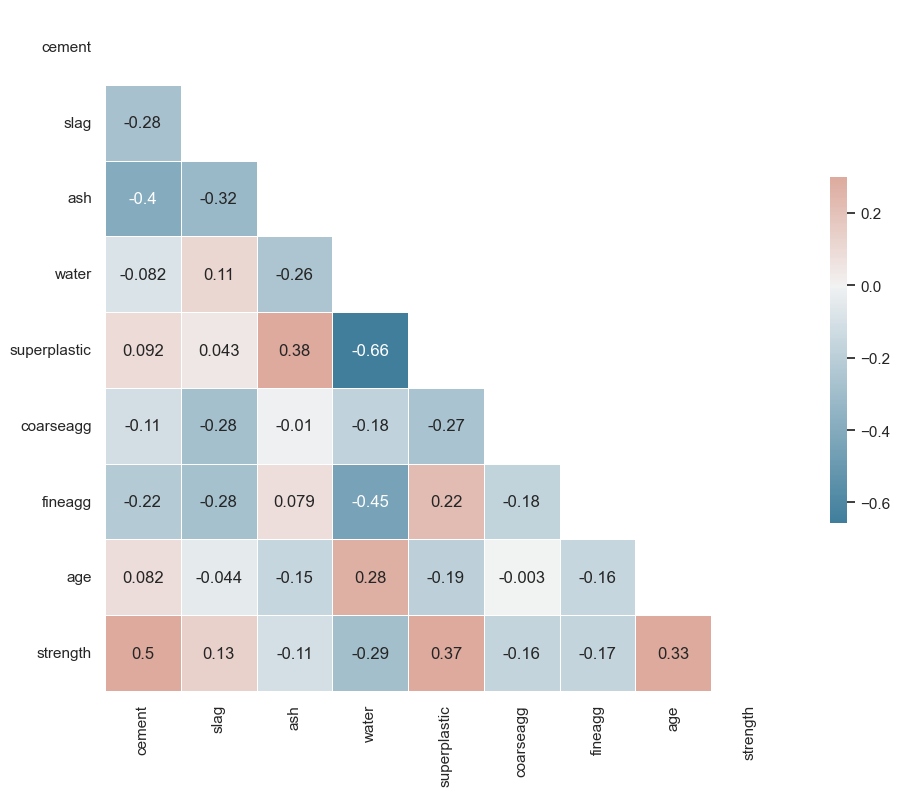

In [8]:
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Diagramas de pares

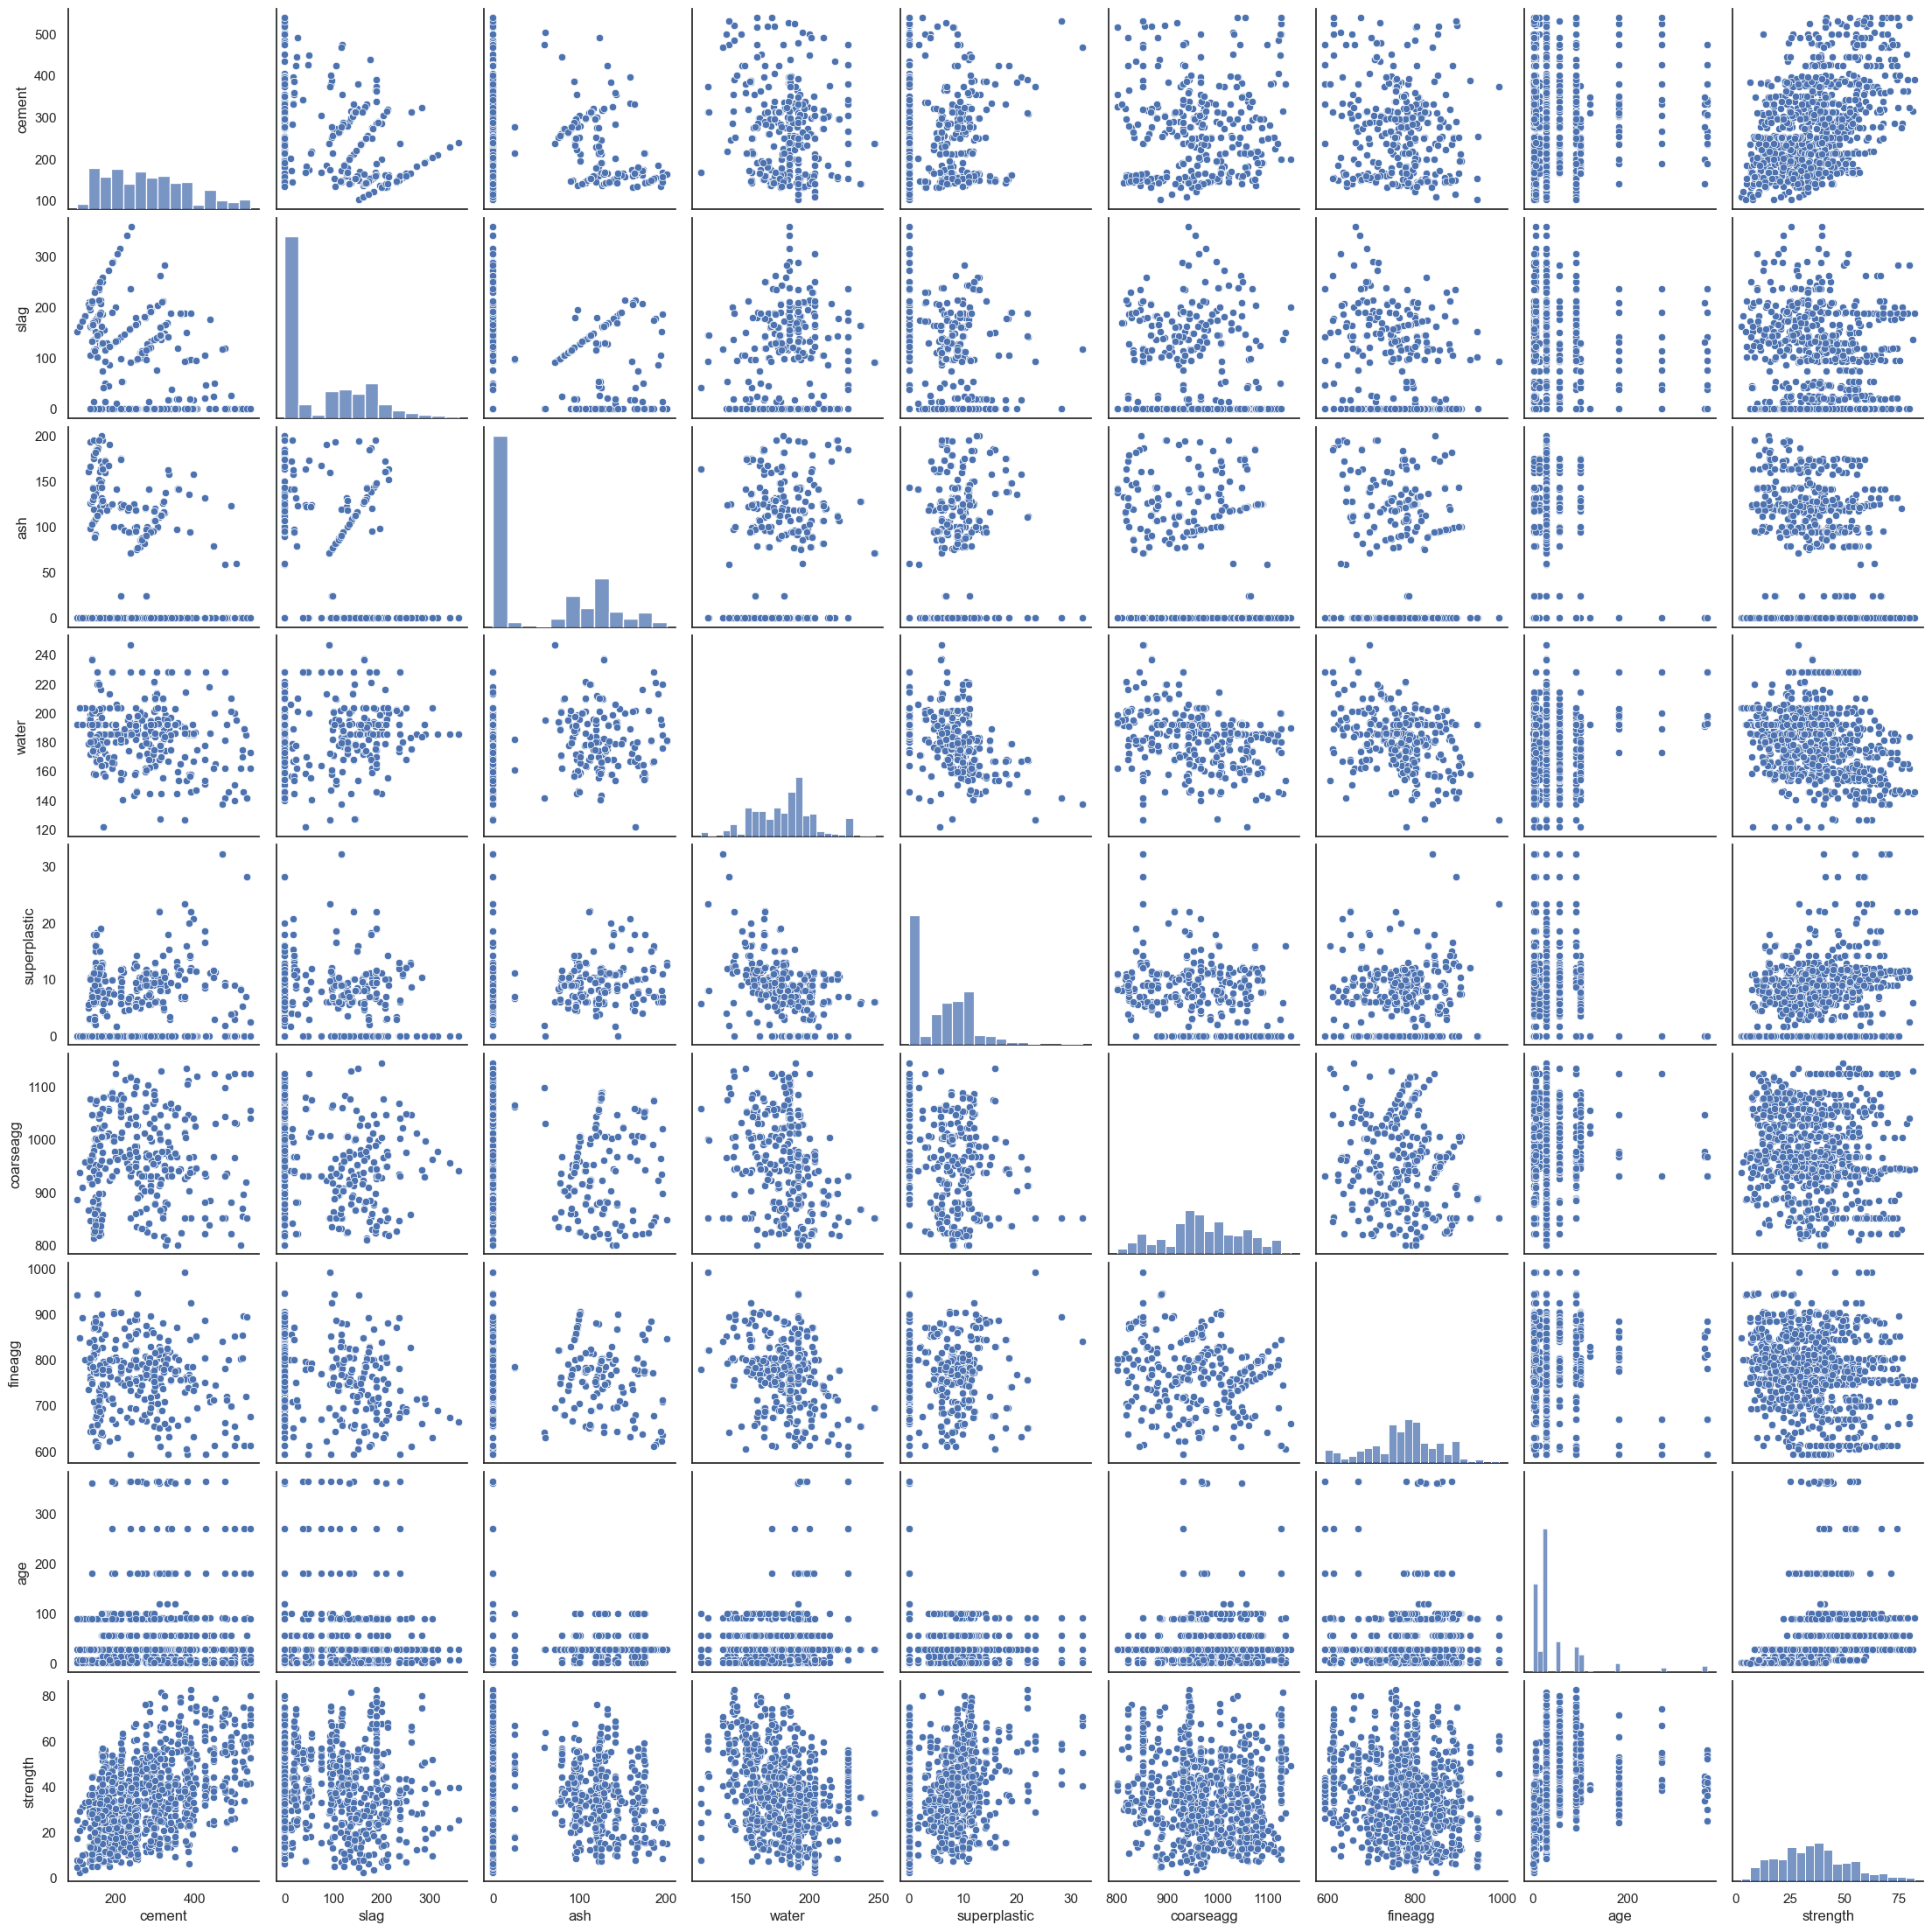

In [9]:
datoscompletos = data.dropna()
sns.pairplot(datoscompletos)

Detalle con tres columnas

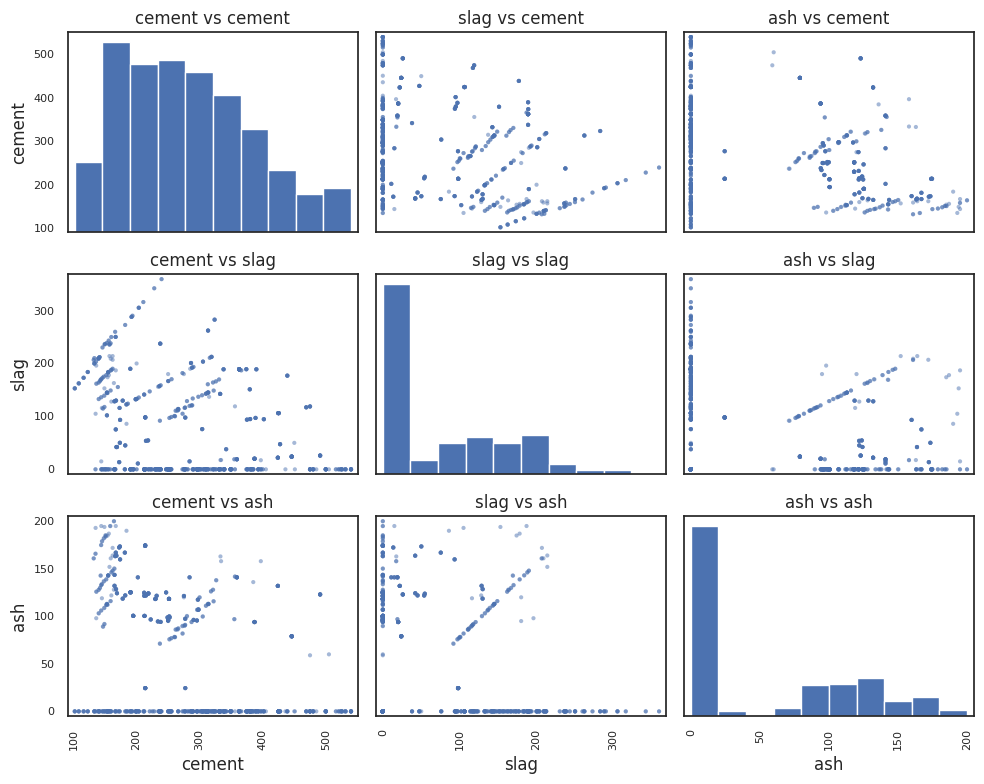

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# create a scatterplot matrix
pd.plotting.scatter_matrix(data[['cement', 'slag', 'ash']], figsize=(10, 8), diagonal='hist')

# add titles to the subplots
for ax in plt.gcf().axes:
    ax.set_title(ax.get_xlabel() + ' vs ' + ax.get_ylabel())

# adjust the layout and spacing between subplots
plt.tight_layout()

# display the plot
plt.show()


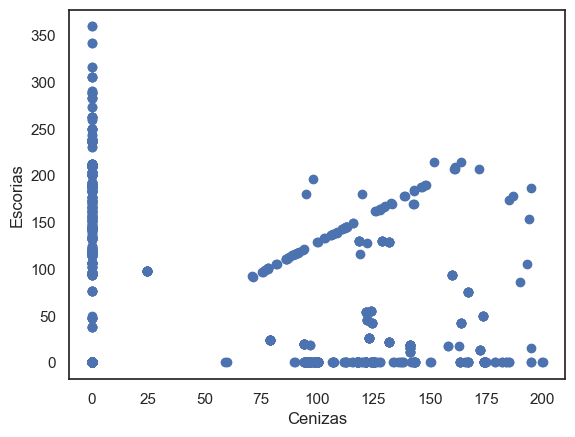

In [10]:
# Representación gráfica de un par de variables

plt.scatter(data["ash"], data['slag'])
plt.xlabel('Cenizas')
plt.ylabel('Escorias')
plt.show()

# Normalización

La siguiente celda de código es opcional. Ejecutarla sólo si se desea utilizar datos normalizados.

Para la regresión lineal NO ES NECESARIA LA NORMALIZACIÓN

En algunos casos, la normalización puede no ser necesaria. Si todas las variables predictoras están en la misma escala o si la escala no afecta significativamente la interpretación y el rendimiento del modelo, entonces normalizar los datos puede ser opcional.

La decisión dependerá de:

1. **Escalas de las variables:** La regresión lineal es sensible a la escala de las variables. Si las variables predictoras (características) están en escalas muy diferentes, el modelo puede dar más peso a las variables con valores más grandes. Normalizar (o estandarizar) los datos puede ayudar a evitar este problema.

2. **Interpretación de coeficientes:** Si la normalización no se realiza y las variables tienen diferentes escalas, la interpretación de los coeficientes del modelo puede volverse más complicada. Los coeficientes representarán el cambio en la variable de respuesta por unidad de cambio en la variable predictor, pero si las variables tienen escalas diferentes, este cambio puede no ser fácil de interpretar.

3. **Convergencia del algoritmo:** Algunos algoritmos de optimización utilizados en la regresión lineal pueden converger más rápidamente si los datos están normalizados. Esto es particularmente importante en algoritmos basados en el descenso de gradiente.


In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_sin_columnas = ss.fit_transform(data)
datos_normalizados = pd.DataFrame(data_sin_columnas, columns = data.columns)

from sklearn.model_selection import train_test_split
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Si no se desea usar datos normalizados ejecutar esta celda para recuperar los originales

In [12]:
datos_normalizados = data.copy()

In [12]:
datos_normalizados.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Regresión Lineal OLS

In [17]:
# Primero instalamos versiones compatibles de las librerías
%pip install --upgrade statsmodels==0.14.0 scipy==1.11.4

# Reiniciar el kernel después de la instalación
import importlib
import sys

# Verificar si statsmodels se puede importar
try:
    import statsmodels.api as sm
    print("✅ statsmodels importado correctamente")
except ImportError as e:
    print(f"❌ Error al importar statsmodels: {e}")
    print("Por favor, reinicia el kernel de Jupyter y ejecuta la celda nuevamente")
    sys.exit()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

print("✅ Todas las librerías importadas correctamente")dir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Agregar constante al conjunto de entrenamiento (intercepto)
X_train = sm.add_constant(X_train)

# Crear el modelo OLS y ajustarlo
model = sm.OLS(y_train, X_train).fit()

# Imprimir el resumen del modelo
print(model.summary())

# Hacer predicciones en el conjunto de prueba
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de rendimiento
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

SyntaxError: invalid syntax (2768580258.py, line 21)

In [ ]:
# EJECUTAR REGRESIÓN OLS
try:
    # Preparar datos para OLS
    y = datos_normalizados['strength']
    X = datos_normalizados.drop('strength', axis=1)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Agregar constante al conjunto de entrenamiento (intercepto)
    # IMPORTANTE: OLS requiere que agreguemos manualmente el término constante
    X_train_const = sm.add_constant(X_train)

    # Crear el modelo OLS y ajustarlo
    model_ols = sm.OLS(y_train, X_train_const).fit()

    # Imprimir el resumen del modelo
    print("=== RESUMEN DEL MODELO OLS ===")
    print(model_ols.summary())

    # Hacer predicciones en el conjunto de prueba
    X_test_const = sm.add_constant(X_test)
    y_pred_ols = model_ols.predict(X_test_const)

    # Calcular métricas de rendimiento
    mse_ols = mean_squared_error(y_test, y_pred_ols)
    r2_ols = r2_score(y_test, y_pred_ols)

    # Imprimir las métricas de rendimiento
    print(f'\n=== MÉTRICAS DE RENDIMIENTO ===')
    print(f'Mean Squared Error (MSE): {mse_ols:.4f}')
    print(f'R-squared (R²): {r2_ols:.4f}')
    print(f'Porcentaje de varianza explicada: {r2_ols*100:.2f}%')

    # Visualización de resultados
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_ols, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.title(f'Regresión OLS: Valores reales vs predichos\nR² = {r2_ols:.4f}')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("✅ OLS ejecutado correctamente")
    
except Exception as e:
    print(f"❌ Error al ejecutar OLS: {e}")
    print("➡️ Ejecuta la celda siguiente con la solución alternativa")

=== REGRESIÓN LINEAL CON INFORMACIÓN ESTADÍSTICA ===
R²: 0.5935
MSE: 109.7038
MAE: 8.3908
Error estándar residual: 6.0906

=== COEFICIENTES DEL MODELO ===
Intercepto: -36.6177
cement: 0.1256
slag: 0.1093
ash: 0.0939
water: -0.1312
superplastic: 0.2946
coarseagg: 0.0220
fineagg: 0.0252
age: 0.1140


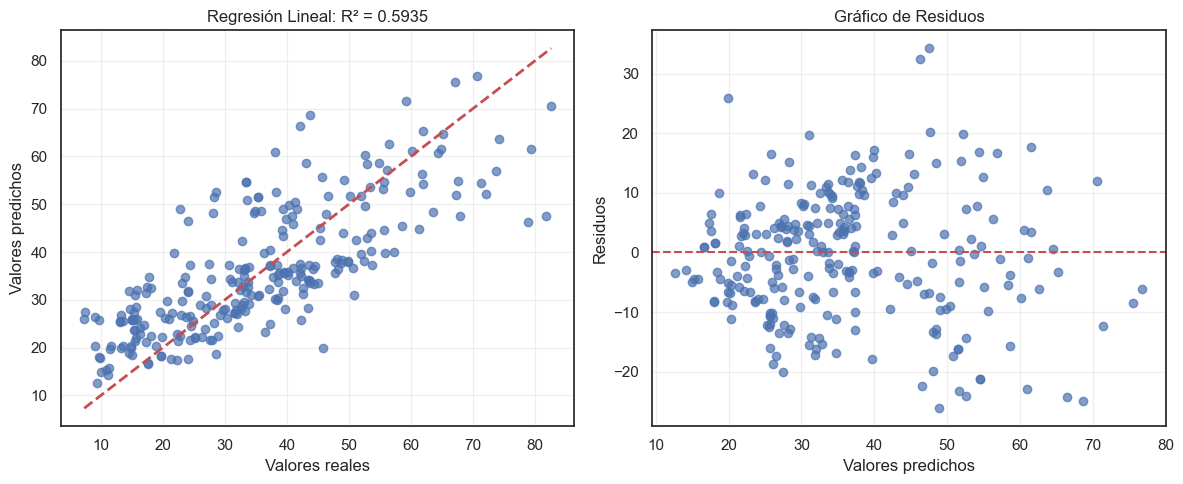

✅ Modelo ejecutado correctamente con sklearn


In [16]:
# SOLUCIÓN ALTERNATIVA: Si persisten problemas con statsmodels
# Podemos usar sklearn con información estadística adicional

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np

print("=== REGRESIÓN LINEAL CON INFORMACIÓN ESTADÍSTICA ===")

# Preparar datos
y = datos_normalizados['strength']
X = datos_normalizados.drop('strength', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Predicciones
y_pred_sklearn = model_sklearn.predict(X_test)

# Métricas básicas
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
mae_sklearn = np.mean(np.abs(y_test - y_pred_sklearn))

print(f"R²: {r2_sklearn:.4f}")
print(f"MSE: {mse_sklearn:.4f}")
print(f"MAE: {mae_sklearn:.4f}")

# Información estadística adicional (simulando OLS)
n = len(y_train)  # número de observaciones
p = X_train.shape[1]  # número de predictores
dof = n - p - 1  # grados de libertad

# Error estándar de los residuos
residuals = y_test - y_pred_sklearn
rse = np.sqrt(np.sum(residuals**2) / dof)
print(f"Error estándar residual: {rse:.4f}")

# Coeficientes del modelo
print("\n=== COEFICIENTES DEL MODELO ===")
print(f"Intercepto: {model_sklearn.intercept_:.4f}")
for i, coef in enumerate(model_sklearn.coef_):
    print(f"{X.columns[i]}: {coef:.4f}")

# Visualización
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_sklearn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title(f'Regresión Lineal: R² = {r2_sklearn:.4f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_sklearn, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Modelo ejecutado correctamente con sklearn")